In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [ ]:
!pip install --upgrade xlrd

     |████████████████████████████████| 96 kB 5.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


###Understanding the Data

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/default of credit card clients.xls',skiprows=[0])
display(df)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df.dtypes

ID                            int64
LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

All variables are of integer datatype

In [ ]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

No missing entries in the dataset

In [ ]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

Categorical Feature Variables: 'SEX', 'EDUCATION', 'MARRIAGE'<br/>
Discrete Feature Variables: 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'<br/>
Continuous Feature Variables: 'LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'

In [ ]:
df[['SEX', 'EDUCATION', 'MARRIAGE']].describe()

,SEX,EDUCATION,MARRIAGE
count,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867
std,0.489129,0.790349,0.521970
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000
75%,2.000000,2.000000,2.000000
max,2.000000,6.000000,3.000000


Anomalous values present wrt labellings in dataset attribute info:<br/>
Education has taken values 0,5,6 which don't have defined labels<br/>
Marriage has taken value 0 whose label is not documented on site

In [ ]:
df[['AGE','LIMIT_BAL']].describe()

,AGE,LIMIT_BAL
count,30000.000000,30000.000000
mean,35.485500,167484.322667
std,9.217904,129747.661567
min,21.000000,10000.000000
25%,28.000000,50000.000000
50%,34.000000,140000.000000
75%,41.000000,240000.000000
max,79.000000,1000000.000000


People are aged between 21 and 79 (mean 35) with credit limit between 10,000 and 1,000,000 (mean 167,484)<br/>


In [ ]:
df[['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].describe()

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100
std,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000


The dataset attribute info assigns '-1' for no delay in payment, while +ve values denote delay in months<br/>
However, as seen from the above table, 0 and -2  values are also recorded<br/>
My assumption: 0 corresponds to on time payment, while -1 and -2, denote advance payment in months

In [ ]:
df[['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [ ]:
df[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


### Data Transformation 1

In [ ]:
X = df.iloc[:,1:24] # Feature Dataset
Y = df.iloc[:,24] # Target Variable

In [ ]:
# performing standardization
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_Scaled = sc.fit_transform(X)

In [ ]:
# splitting data into train, test and validation sets
from sklearn.model_selection import train_test_split
X_train,X2,Y_train,Y2 = train_test_split(X_Scaled,Y,test_size = 0.3)
X_val,X_test,Y_val,Y_test = train_test_split(X2,Y2,test_size = 0.5)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(21000, 23) (21000,) (4500, 23) (4500,) (4500, 23) (4500,)


###Machine Learning 1

In [ ]:
# Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
n_estimators = [10,20,50,100,200,500,1000]
criterion = ['gini', 'entropy']
for c in criterion:
  print("Criterion = "+c)
  for n in n_estimators:
    print("No of estimators = "+str(n))
    rfc = RandomForestClassifier(criterion = c, n_estimators = n)
    rfc.fit(X_train,Y_train)
    Y_pred = rfc.predict(X_val)
    print(metrics.accuracy_score(Y_val, Y_pred))
  print()

Criterion = gini
No of estimators = 10
0.8128888888888889
No of estimators = 20
0.82
No of estimators = 50
0.8222222222222222
No of estimators = 100
0.8255555555555556
No of estimators = 200
0.8273333333333334
No of estimators = 500
0.8271111111111111
No of estimators = 1000
0.826

Criterion = entropy
No of estimators = 10
0.8153333333333334
No of estimators = 20
0.8166666666666667
No of estimators = 50
0.8264444444444444
No of estimators = 100
0.8264444444444444
No of estimators = 200
0.8266666666666667
No of estimators = 500
0.8266666666666667
No of estimators = 1000
0.8268888888888889



Best classification accuracy = 0.8273 for n_estimators = 200 & criterion = gini

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LgM = LogisticRegression()
LgM.fit(X_train,Y_train)
Y_pred = LgM.predict(X_val)
print(metrics.accuracy_score(Y_val, Y_pred))

0.8177777777777778


In [ ]:
# Support Vector Classification Model
from sklearn.svm import SVC
C = [1,5,10,50,100,500,1000]
for c in C:
  print("C = "+str(c))
  svc=SVC(C=c)
  svc.fit(X_train,Y_train)
  Y_pred = svc.predict(X_val)
  print(metrics.accuracy_score(Y_val, Y_pred))

C = 1
0.828
C = 5
0.8275555555555556
C = 10
0.8248888888888889
C = 50
0.8188888888888889
C = 100
0.8142222222222222
C = 500
0.7993333333333333
C = 1000
0.786


Best classification accuracy = 0.828 for C = 1

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Multi-Layer Perceptron Classification (NN) Model
from sklearn.neural_network import MLPClassifier
alphas = [0.0001,0.001,0.01,0.1,1]
for a in alphas:
  print('Alpha = '+str(a))
  mlp = MLPClassifier(alpha=a)
  mlp.fit(X_train, Y_train)
  Y_pred = mlp.predict(X_val)
  print(metrics.accuracy_score(Y_val, Y_pred))

Alpha = 0.0001
0.8202222222222222
Alpha = 0.001
0.8206666666666667
Alpha = 0.01
0.8204444444444444
Alpha = 0.1
0.8211111111111111
Alpha = 1
0.8237777777777778


Best classification accuracy = 0.8238 for alpha = 1

In [ ]:
# Test using SVC (best accuracy amongst the 4)
svc2 = SVC(C=1)
svc2.fit(X_train,Y_train)
Y_pred2 = svc2.predict(X_test)
CA = metrics.accuracy_score(Y_test, Y_pred2)
print("Test Classification Accuracy = "+str(CA))

Test Classification Accuracy = 0.8233333333333334


### Data Cleaning

In [ ]:
df = df.rename(columns={'default payment next month': 'DEFAULT?', 'PAY_0': 'PAY_1'}) # Renaming weird column names
df['EDUCATION'] = df['EDUCATION'].replace([0,5,6],[4,4,4]) # Merge entries 0,5,6 with 4 (for others category)
df['MARRIAGE'] = df['MARRIAGE'].replace([0],[3]) # Merge entry 0 with 3 (for others category)

In [ ]:
display(df)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT?
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT?
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.842267,1.557267,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.744494,0.521405,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,1.000000,1.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Exploratory Data Analysis

Q. What are the correlations between different variables?

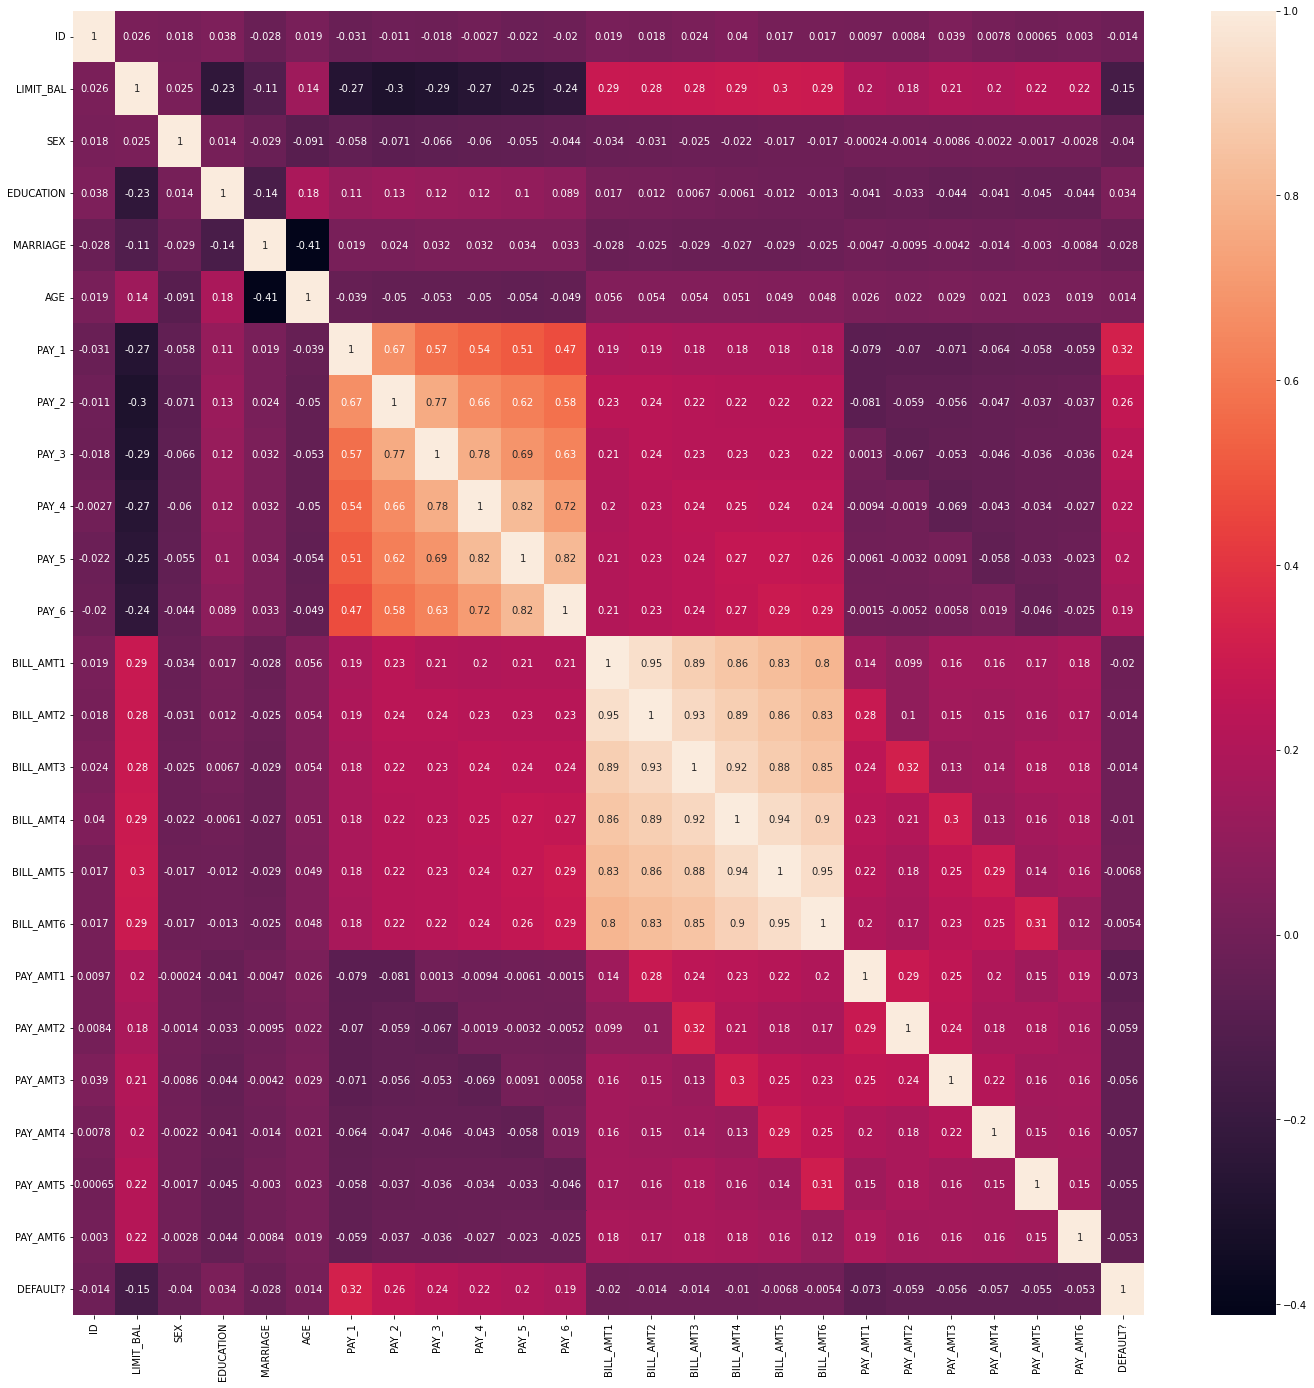

In [ ]:
# Correlation Heatmap
import matplotlib.pyplot as plt
plt, ax = plt.subplots(figsize=(24,24))
cm = df.corr()
ax = sn.heatmap(cm,annot=True)
plt.show()

Replacing values with labels for effective EDAV

In [ ]:
df2 = df.copy(deep=True)
df2['SEX'] = df2['SEX'].replace([1,2],['Male','Female'])
df2['EDUCATION'] = df2['EDUCATION'].replace([1,2,3,4],['Grad School','University','High School','Others'])
df2['MARRIAGE'] = df2['MARRIAGE'].replace([1,2,3],['Married','Single','Others'])
df2['DEFAULT?'] = df2['DEFAULT?'].replace([0,1],['No','Yes'])

As we have to predict the 'DEFAULT?' variable, let us analyse its relationship with other variables and get ideas for feature engineering

Q. How does gender affect default in payment?

In [ ]:
ct = pd.crosstab(df2['SEX'],df2['DEFAULT?'])
ct

DEFAULT?,No,Yes
SEX,,
Female,14349,3763
Male,9015,2873


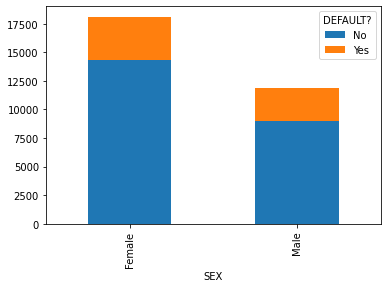

In [ ]:
ct.plot(kind='bar', stacked = True)

In [ ]:
ct['%Yes'] = ct['Yes']*100/(ct['Yes']+ct['No'])
ct

DEFAULT?,No,Yes,%Yes
SEX,,,
Female,14349,3763,20.776281
Male,9015,2873,24.167227


More females present in dataset but men are more likely to default

Q. How does education affect default in payment?

In [ ]:
ct2 = pd.crosstab(df2['EDUCATION'],df2['DEFAULT?'])
ct2

DEFAULT?,No,Yes
EDUCATION,,
Grad School,8549,2036
High School,3680,1237
Others,435,33
University,10700,3330


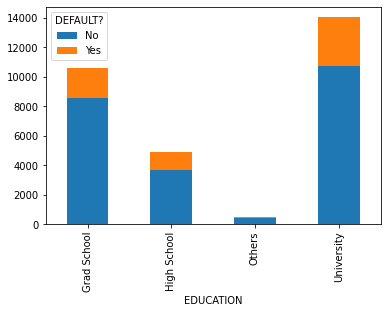

In [ ]:
ct2.plot(kind='bar', stacked = True)

In [ ]:
ct2['%Yes'] = ct2['Yes']*100/(ct2['Yes']+ct2['No'])
ct2

DEFAULT?,No,Yes,%Yes
EDUCATION,,,
Grad School,8549,2036,19.234766
High School,3680,1237,25.157616
Others,435,33,7.051282
University,10700,3330,23.734854


Most people in dataset have university level education<br/>
Ignoring 'others', more educated people are less likely to default

Q. How does marital status affect default in payment?

In [ ]:
ct3 = pd.crosstab(df2['MARRIAGE'],df2['DEFAULT?'])
ct3

DEFAULT?,No,Yes
MARRIAGE,,
Married,10453,3206
Others,288,89
Single,12623,3341


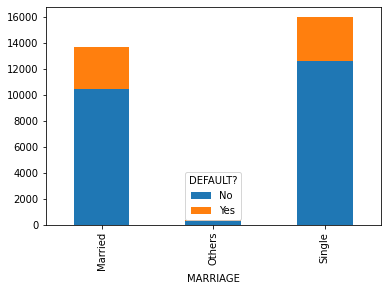

In [ ]:
ct3.plot(kind='bar', stacked = True)

In [ ]:
ct3['%Yes'] = ct3['Yes']*100/(ct3['Yes']+ct3['No'])
ct3

DEFAULT?,No,Yes,%Yes
MARRIAGE,,,
Married,10453,3206,23.471704
Others,288,89,23.607427
Single,12623,3341,20.928339


There are more single people in dataset and they are less likely to default

Q. How does age affect default in payment?

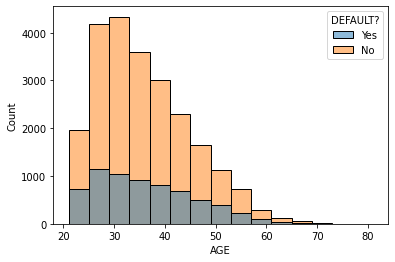

In [ ]:
sn.histplot(x = 'AGE', data = df2, hue = 'DEFAULT?', binwidth = 4)

Lesser proportion of people default around age 30 (possibly due to stable income in working class)<br/>
Binning the age and labeling it could become a better feature than absolute value of age

Q. How do previous payment timings affect default in next payment?

In [ ]:
df2[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEFAULT?']]

,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,DEFAULT?
0,2,2,-1,-1,-2,-2,Yes
1,-1,2,0,0,0,2,Yes
2,0,0,0,0,0,0,No
3,0,0,0,0,0,0,No
4,-1,0,-1,0,0,0,No
...,...,...,...,...,...,...,...
29995,0,0,0,0,0,0,No
29996,-1,-1,-1,-1,0,0,No
29997,4,3,2,-1,0,0,Yes
29998,1,-1,0,0,0,-1,Yes


Higher delays could mean more likelihood of default

In [ ]:
import warnings
warnings.filterwarnings('ignore')

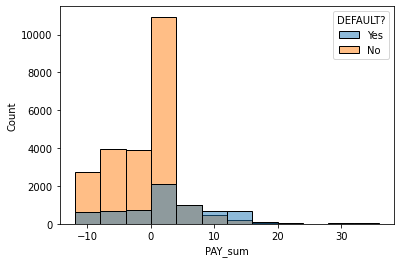

In [ ]:
df2['PAY_sum'] = df2[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis=1)
sn.histplot(x = 'PAY_sum', data = df2, hue = 'DEFAULT?', binwidth = 4)

Sum of delays as a new variable could be a good feature

Q. How do previous bill amounts and credit limit affect default?

In [ ]:
df2[['LIMIT_BAL','BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6','DEFAULT?']]

,LIMIT_BAL,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,DEFAULT?
0,20000,3913,3102,689,0,0,0,Yes
1,120000,2682,1725,2682,3272,3455,3261,Yes
2,90000,29239,14027,13559,14331,14948,15549,No
3,50000,46990,48233,49291,28314,28959,29547,No
4,50000,8617,5670,35835,20940,19146,19131,No
...,...,...,...,...,...,...,...,...
29995,220000,188948,192815,208365,88004,31237,15980,No
29996,150000,1683,1828,3502,8979,5190,0,No
29997,30000,3565,3356,2758,20878,20582,19357,Yes
29998,80000,-1645,78379,76304,52774,11855,48944,Yes


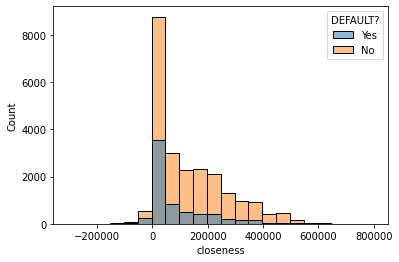

In [ ]:
df2['closeness'] = df2['LIMIT_BAL'] - df2['BILL_AMT1']
sn.histplot(x = 'closeness', data = df2, hue = 'DEFAULT?', binwidth = 50000)

If latest bill is closer to limit, possible that default is more likelier

Q. How do previous payment values affect default in next payment?

In [ ]:
df2[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT?']]

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT?
0,0,689,0,0,0,0,Yes
1,0,1000,1000,1000,0,2000,Yes
2,1518,1500,1000,1000,1000,5000,No
3,2000,2019,1200,1100,1069,1000,No
4,2000,36681,10000,9000,689,679,No
...,...,...,...,...,...,...,...
29995,8500,20000,5003,3047,5000,1000,No
29996,1837,3526,8998,129,0,0,No
29997,0,0,22000,4200,2000,3100,Yes
29998,85900,3409,1178,1926,52964,1804,Yes


Low or zero payment amounts could mean more likelihood of default

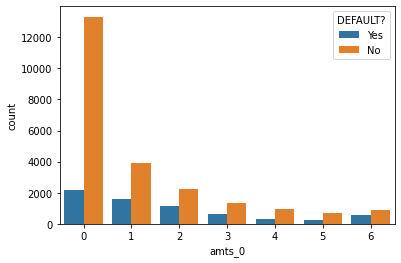

In [ ]:
df2['amts_0'] = df2[df2[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] == 0].count(axis=1)
sn.countplot(x = 'amts_0', data = df2, hue = 'DEFAULT?')

Higher the number of zero payments, higher is the proprtion of defaulting.
Hence, number of 0 payments could be a new feature

###Feature Engineering

In [ ]:
X = df.iloc[:,1:24] # Feature Dataset
X['AGE_BIN'] = pd.qcut(X['AGE'], 6, labels=[1,2,3,4,5,6]) # Binning age into 6 categories by quantiles
X['PAY_SUM'] = X[['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].sum(axis=1) # Sum of payment delays (in months)
X['CLOSENESS'] = X['LIMIT_BAL'] - X['BILL_AMT1'] # Closeness of latest bill to credit limit
X['No_OF_0_PAY'] = X[X[['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']] == 0].count(axis=1) # No of zero payments
display(X)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,AGE_BIN,PAY_SUM,CLOSENESS,No_OF_0_PAY
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,689,0,0,0,0,1,-2,16087,5
1,120000,2,2,2,26,-1,2,0,0,0,...,0,1000,1000,1000,0,2000,1,3,117318,2
2,90000,2,2,2,34,0,0,0,0,0,...,1518,1500,1000,1000,1000,5000,3,0,60761,0
3,50000,2,2,1,37,0,0,0,0,0,...,2000,2019,1200,1100,1069,1000,4,0,3010,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,2000,36681,10000,9000,689,679,6,-2,41383,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,8500,20000,5003,3047,5000,1000,4,0,31052,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,1837,3526,8998,129,0,0,5,-4,148317,2
29997,30000,1,2,2,37,4,3,2,-1,0,...,0,0,22000,4200,2000,3100,4,8,26435,2
29998,80000,1,3,1,41,1,-1,0,0,0,...,85900,3409,1178,1926,52964,1804,5,-1,81645,0


### Dimensionality Reduction

In [ ]:
X_Scaled = sc.fit_transform(X) # Standardisation

In [ ]:
from sklearn.decomposition import PCA
errors = []
for i in range(1,28):
    pca = PCA(n_components=i)
    pca_result = pca.fit_transform(X_Scaled)
    pca_back = pca.inverse_transform(pca_result)
    rmse = np.linalg.norm(X_Scaled-pca_back,None)
    nRMSE = rmse/np.linalg.norm(X_Scaled,None)
    errors.append(nRMSE)

Normalised Root Mean Square 'Reconstruction' Error (Percentage):

In [ ]:
[i*100 for i in errors]

[85.43496865485982,
 74.17086370974245,
 68.20812872923332,
 63.43471449911047,
 59.64543525288649,
 56.357701304275324,
 53.09265301613987,
 49.8067914304155,
 46.390133757359955,
 42.76589229624944,
 39.23029462759663,
 35.48480243581482,
 31.43059119156594,
 27.07912400095277,
 23.11541918769544,
 19.660634027197478,
 17.037419945657994,
 13.981911522572052,
 11.207126806161465,
 8.763723508074053,
 7.080943589431694,
 5.801432966190398,
 4.257055298854779,
 2.9509182815131005,
 1.3354562442627355e-13,
 1.3554966461749717e-13,
 1.3559849657770972e-13]

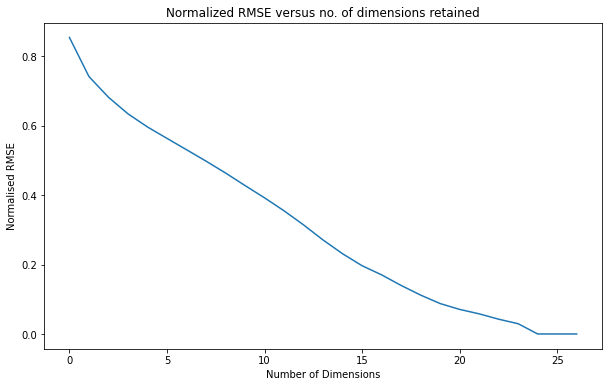

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.title("Normalized RMSE versus no. of dimensions retained")
plt.xlabel("Number of Dimensions")
plt.ylabel("Normalised RMSE")
plt.plot(errors)
plt.show()

Percentage of Variance explained by 'n' principal components:

In [ ]:
print(pca.explained_variance_ratio_.cumsum() * 100)

[ 27.00866131  44.98682977  53.47689267  59.76040143  64.4242608
  68.23844967  71.81173234  75.1928367   78.47955501  81.71078456
  84.60983984  87.40828796  90.12117937  92.66721043  94.65677396
  96.1345947   97.09726322  98.0450615   98.74400309  99.2319715
  99.49860238  99.66343376  99.8187748   99.91292081 100.
 100.         100.        ]


Text(0.5, 1.0, 'Variation of % explained variance with # of dimensions')

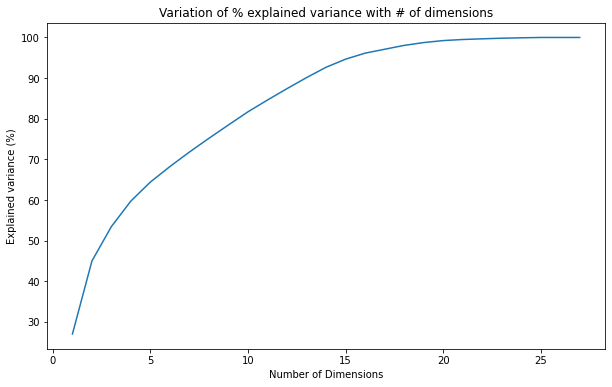

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(range(1,28), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of Dimensions")
plt.ylabel("Explained variance (%)")
plt.title("Variation of % explained variance with # of dimensions")

Top 20 principal components account for > 99 % of variation in data and cause < 10 % reconstruction error

### Data Transformation 2

In [ ]:
# Target Variable
Y = df.iloc[:,24]

# Top 20 Principal Components
pca = PCA(n_components = 20)
pca_result = pca.fit_transform(X_Scaled)

# Train, Val, Test Split
X_train,X2,Y_train,Y2 = train_test_split(pca_result,Y,test_size = 0.3)
X_val,X_test,Y_val,Y_test = train_test_split(X2,Y2,test_size = 0.5)
print(X_train.shape,Y_train.shape,X_val.shape,Y_val.shape,X_test.shape,Y_test.shape)

(21000, 20) (21000,) (4500, 20) (4500,) (4500, 20) (4500,)


### Machine Learning 2

In [ ]:
# Random Forest Classification Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
n_estimators = [10,20,50,100,200,500,1000]
criterion = ['gini', 'entropy']
for c in criterion:
  print("Criterion = "+c)
  for n in n_estimators:
    print("No of estimators = "+str(n))
    rfc = RandomForestClassifier(criterion = c, n_estimators = n)
    rfc.fit(X_train,Y_train)
    Y_pred = rfc.predict(X_val)
    print(metrics.accuracy_score(Y_val, Y_pred))
  print()

Criterion = gini
No of estimators = 10
0.7931111111111111
No of estimators = 20
0.8044444444444444
No of estimators = 50
0.8033333333333333
No of estimators = 100
0.8084444444444444
No of estimators = 200
0.8106666666666666
No of estimators = 500
0.8113333333333334
No of estimators = 1000
0.8115555555555556

Criterion = entropy
No of estimators = 10
0.7933333333333333
No of estimators = 20
0.8066666666666666
No of estimators = 50
0.8071111111111111
No of estimators = 100
0.8111111111111111
No of estimators = 200
0.8084444444444444
No of estimators = 500
0.8104444444444444
No of estimators = 1000
0.8108888888888889



Best classification accuracy = 0.8116 for n_estimators = 1000 & criterion = gini

In [ ]:
# Logistic Regression Model
from sklearn.linear_model import LogisticRegression
LgM = LogisticRegression()
LgM.fit(X_train,Y_train)
Y_pred = LgM.predict(X_val)
print(metrics.accuracy_score(Y_val, Y_pred))

0.8048888888888889


In [ ]:
# Support Vector Classification Model
from sklearn.svm import SVC
C = [1,5,10,50,100]
for c in C:
  print("C = "+str(c))
  svc=SVC(C=c)
  svc.fit(X_train,Y_train)
  Y_pred = svc.predict(X_val)
  print(metrics.accuracy_score(Y_val, Y_pred))

C = 1
0.8173333333333334
C = 5
0.8153333333333334
C = 10
0.8153333333333334
C = 50
0.8042222222222222
C = 100
0.7988888888888889


Best classification accuracy = 0.8173 for C = 1

In [ ]:
from xgboost import XGBClassifier
XGBC = XGBClassifier()
XGBC.fit(X_train,Y_train)
Y_pred = XGBC.predict(X_val)
print(metrics.accuracy_score(Y_val, Y_pred))

0.8146666666666667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(max_depth = 3)
DTC.fit(X_train,Y_train)
Y_pred = DTC.predict(X_val)
print(metrics.accuracy_score(Y_val, Y_pred))

0.7964444444444444


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
neurons = [(10, ),(25, ),(50, ),(75, ),(100, )]
alphas = [0.0001,0.001,0.01,0.1,1]
solver = ['lbfgs','sgd','adam']
activation = ['identity', 'logistic', 'tanh', 'relu']
max_iter = [100,200,500]
learning_rate = ['constant', 'invscaling', 'adaptive']
momentum = [0.1,0.25,0.5,0.75,1]
batch_size = [32,64,100,200]
param_grid = {'hidden_layer_sizes': neurons,
              'alpha': alphas,
              'solver': solver,
              'activation': activation,
              'max_iter': max_iter,
              'learning_rate': learning_rate,
              'batch_size': batch_size,
              'momentum': momentum}
mlp = MLPClassifier()
mlpc = RandomizedSearchCV(estimator = mlp, param_distributions = param_grid)
mlpc.fit(X_train,Y_train)
mlpc.best_params_

{'activation': 'tanh',
 'alpha': 0.1,
 'batch_size': 32,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'adaptive',
 'max_iter': 500,
 'momentum': 0.5,
 'solver': 'adam'}

In [ ]:
mlpc = MLPClassifier(activation = 'tanh', 
                     alpha = 0.1, 
                     batch_size = 32, 
                     hidden_layer_sizes = (100,), 
                     learning_rate = 'adaptive',
                     max_iter = 500,
                     momentum = 0.5,
                     solver = 'adam')
mlpc.fit(X_train,Y_train)
Y_pred = mlpc.predict(X_val)
CA = metrics.accuracy_score(Y_val, Y_pred)
print("Best classification accuracy = "+str(CA))

Best classification accuracy = 0.8153333333333334


In [ ]:
# Test using SVC (best accuracy amongst the 6)
svc3 = SVC(C=1)
svc3.fit(X_train,Y_train)
Y_pred3 = svc3.predict(X_test)
CA = metrics.accuracy_score(Y_test, Y_pred3)
print("Test Classification Accuracy = "+str(CA))

Test Classification Accuracy = 0.8184444444444444
